# 4.10 Part 1

### 01. Import Libraries & Data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Create folder path
path = r'/Users/madelinegamache/Documents/InstaCart Basket Analysis'

In [3]:
# Import customer_ords_prods_merged.pkl dataframe
df_cust_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'customer_ords_prods_merged.pkl'))

In [4]:
# Check output
df_cust_merge.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,frequency_flag,first_name,last_name,gender,state,age,date_joined,total_dependants,marital_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [5]:
df_cust_merge.shape

(32404859, 34)

### 02. Addressing Security Implications
- Remove any personal identifiable information in dataframe

In [6]:
# Remove 'first_name' and 'last_name' columns so customers cannot be personally identified
df_cust_merge = df_cust_merge.drop(columns = ['first_name', 'last_name'])

In [7]:
# Check output
df_cust_merge.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', '_merge', ' price_range_loc',
       'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'mean_price',
       'spending_flag', 'median_prior_orders', 'frequency_flag', 'gender',
       'state', 'age', 'date_joined', 'total_dependants', 'marital_status',
       'income'],
      dtype='object')

In [8]:
df_cust_merge.shape

(32404859, 32)

### 03. Customer Behavior in Different Geographic Areas
- Create "region" column based on state
- Determine if there are different spending habits based on different regions

In [9]:
# Checking to see how states are written in the dataframe
df_cust_merge['state'].value_counts(dropna = False)

Pennsylvania            667082
California              659783
Rhode Island            656913
Georgia                 656389
New Mexico              654494
Arizona                 653964
North Carolina          651900
Oklahoma                651739
Alaska                  648495
Minnesota               647825
Massachusetts           646358
Wyoming                 644255
Virginia                641421
Missouri                640732
Texas                   640394
Colorado                639280
Maine                   638583
North Dakota            638491
Alabama                 638003
Kansas                  637538
Louisiana               637482
Delaware                637024
South Carolina          636754
Oregon                  636425
Arkansas                636144
Nevada                  636139
New York                635983
Montana                 635265
South Dakota            633772
Illinois                633024
Hawaii                  632901
Washington              632852
Mississi

In [10]:
# Combine states into regions based on wikipedia page: 'List of regions of the United States' linked in instructions.
northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
south = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
west = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [11]:
# Use the loc function to determine the region 
df_cust_merge.loc[df_cust_merge['state'].isin(northeast), 'region'] = 'Northeast'
df_cust_merge.loc[df_cust_merge['state'].isin(midwest), 'region'] = 'Midwest'
df_cust_merge.loc[df_cust_merge['state'].isin(south), 'region'] = 'South'
df_cust_merge.loc[df_cust_merge['state'].isin(west), 'region'] = 'West'

In [12]:
# Check output for new 'region' column
df_cust_merge['region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

In [13]:
# Create a crosstab between region and spending_flag columns to compare regional spending habits
crosstab_region_spending = pd.crosstab(df_cust_merge['region'], df_cust_merge['spending_flag'], dropna = False)

In [14]:
crosstab_region_spending

spending_flag,High spender,Low spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


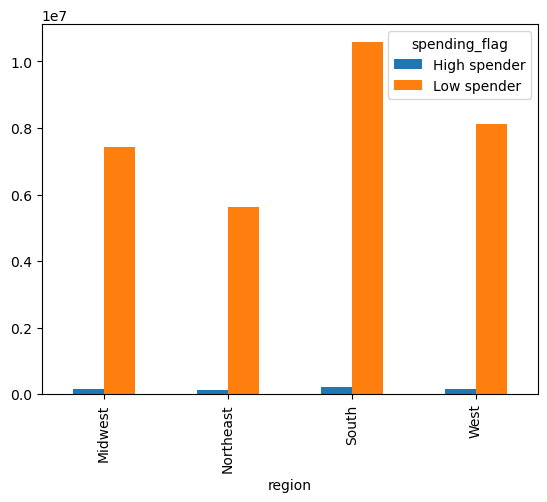

In [15]:
# Create bar chart of results for visualization aid
region_spending_bar = crosstab_region_spending.plot.bar()

##### Observations: The low spenders drastically outnumber high spenders. The South region has the highest number of low spenders and high spenders and the Northeast has the lowest number of low spends and high spenders.

In [16]:
# Export bar chart
region_spending_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_spending_bar.png'))

### 04. Exclude Low-Activity Customers
- Create exclusion flag for customers with less than 5 orders
- Exclude them from dataframe
- Export sample

In [17]:
# Checking 'max_order' values to asses best way to group them
df_cust_merge['max_order'].max()

99

In [18]:
df_cust_merge['max_order'].mean()

33.052167269112324

In [19]:
df_cust_merge['max_order'].median()

26.0

In [20]:
# Create exclusion flag for low-activity customers with less than 5 orders
df_cust_merge.loc[df_cust_merge['max_order'] < 5, 'order_activity_flag'] = 'Low-activity customer'

In [21]:
# Create flag for high-activity customers with 5 or more orders
df_cust_merge.loc[df_cust_merge['max_order'] >=5, 'order_activity_flag'] = 'High-activity customer'

In [22]:
# Creating a sample with only high-activity customers
high_actv_cust_merge = df_cust_merge[df_cust_merge['order_activity_flag'] == 'High-activity customer']

In [23]:
# Check shape excluding low-activity customers
high_actv_cust_merge.shape

(30964564, 34)

In [24]:
# Export sample
high_actv_cust_merge.to_pickle(os.path.join(path,'02 Data','Prepared Data','high_actv_cust.pkl'))

### 05. Customer Profiling

##### Age

In [25]:
# Create age profile
# Customers 35 and younger are classified as "Young"
df_cust_merge.loc[df_cust_merge['age'] <= 35, 'age_profile'] = 'Young'

In [26]:
# Customers over the age of 35 but younger than 65 are classified as "Middle-aged"
df_cust_merge.loc[(df_cust_merge['age'] > 35) & (df_cust_merge['age'] < 65), 'age_profile'] = 'Middle-aged'

In [27]:
# Customers 65 and older are considered to be 'Senior'
df_cust_merge.loc[df_cust_merge['age'] >= 65, 'age_profile'] = 'Senior'

In [28]:
# Check value counts
df_cust_merge['age_profile'].value_counts(dropna = False)

Middle-aged    14683356
Young           9146419
Senior          8575084
Name: age_profile, dtype: int64

##### Income

In [37]:
#Check the descriptive statistics for income variable
df_cust_merge['income'].describe()

count    3.240486e+07
mean     9.943773e+04
std      4.305727e+04
min      2.590300e+04
25%      6.700400e+04
50%      9.661800e+04
75%      1.279120e+05
max      5.939010e+05
Name: income, dtype: float64

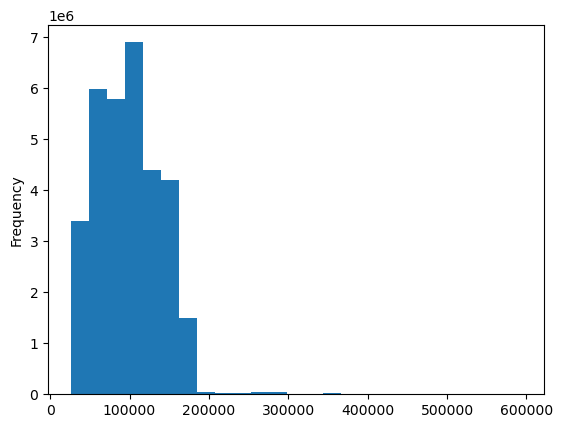

In [38]:
# Create histogram of customer income
cust_income_hist = df_cust_merge['income'].plot.hist(bins = 25)

In [39]:
# Export histogram
cust_income_hist.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'cust_income_hist.png' ))

In [30]:
# Create income profile
# Customers who make less than $75,000 are considered 'low-income'
df_cust_merge.loc[df_cust_merge['income'] < 75000, 'income_profile'] = 'Low income'

In [31]:
# Customers who make between $75,000 and $125,000 are considered "mid-income"
df_cust_merge.loc[(df_cust_merge['income'] >= 75000) & (df_cust_merge['income'] < 125000), 'income_profile'] = "Mid income"

In [33]:
# Customers who make $125,000 and over are considered 'high-income'
df_cust_merge.loc[df_cust_merge['income'] >= 125000, 'income_profile'] = 'High income'

In [34]:
# Check value counts for income_profile
df_cust_merge['income_profile'].value_counts(dropna = False)

Mid income     13331136
Low income     10442766
High income     8630957
Name: income_profile, dtype: int64

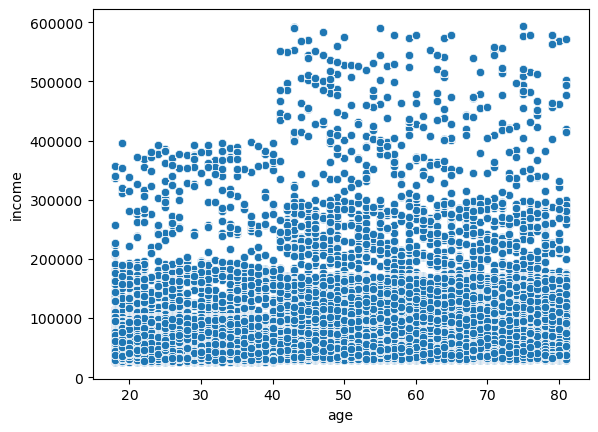

In [35]:
# Recreating a scatterplot from Task 4.9 to show income range by age 
splot = sns.scatterplot(x = 'age', y = 'income', data = df_cust_merge)

##### Department

In [42]:
# Creating crosstab between 'department_id' and 'user_id'
cross_dept_user = pd.crosstab(df_cust_merge['department_id'], df_cust_merge['user_id'], dropna = False)

Use department_id to seperate customers into pet owners and non pet owners

In [43]:
# Assigning pet flags to users and storing it in a dictionary
pet_dict = dict()
for user in cross_dept_user:
    workinglist = cross_dept_user[user].tolist()
    if workinglist[7] == 0 :      # the index starts at 0, so index 0 corresponds to dep_id=1
        pet_dict[user] = 'No pet'
    else:
        pet_dict[user] = 'Pet owner'

In [44]:
# Assigning user flags to the pet_flag
pet_flag = []
for user in df_cust_merge['user_id']:
    pet_flag.append(pet_dict[user])

In [45]:
# Adding pet_flag column to as pet_profile
df_cust_merge['pet_profile'] = pet_flag

In [46]:
# Checking frequency distribution for pet_profile
df_cust_merge['pet_profile'].value_counts(dropna = False)

No pet       28876718
Pet owner     3528141
Name: pet_profile, dtype: int64

Use department_id to seperate customers based on diet choice

In [47]:
# Assigning diet flags to users and storing it in a dictionary
diet_dict = dict()
for user in cross_dept_user:
    workinglist = cross_dept_user[user].tolist()
    if workinglist[11] == 0 and workinglist[15] == 0:
        diet_dict[user] = 'Vegan'
    elif workinglist[11] == 0:
        diet_dict[user] = 'Vegetarian'
    else:
        diet_dict[user] = 'Meat-consumer'

In [49]:
# Assigning user flags to the list
diet_flag = []
for user in df_cust_merge['user_id']:
    diet_flag.append(diet_dict[user])

In [50]:
# Adding 'diet_style' column
df_cust_merge['diet_style'] = diet_flag

In [53]:
# Check frequency distribution
df_cust_merge['diet_style'].value_counts(dropna = False)

Meat-consumer    23762619
Vegetarian        8258813
Vegan              383427
Name: diet_style, dtype: int64

##### Family Status & Dependents

In [54]:
# Frequency distribution for marital_status
df_cust_merge['marital_status'].value_counts(dropna = False)

married                             22756753
single                               5325691
divorced/widowed                     2771812
living with parents and siblings     1550603
Name: marital_status, dtype: int64

In [56]:
# Creating a crosstab between total_dependants and martial_status
family_cross = pd.crosstab(df_cust_merge['marital_status'], df_cust_merge['total_dependants'], dropna = False)

In [57]:
family_cross

total_dependants,0,1,2,3
marital_status,,,,
divorced/widowed,2771812,0,0,0
living with parents and siblings,0,530200,507963,512440
married,0,7550904,7583180,7622669
single,5325691,0,0,0


In [59]:
# Create family_status classification of customers with 0 dependents as 'no dependants'
df_cust_merge.loc[(df_cust_merge['total_dependants'] == 0), 'dependants'] = 'No dependants'

In [60]:
# Create family status classificstion of customers with 1 or more dependant as 'Has dependants'
df_cust_merge.loc[(df_cust_merge['total_dependants'] >= 1), 'dependants'] = 'Has dependants'

In [61]:
# Check the 'dependants' counts 
df_cust_merge['dependants'].value_counts(dropna = False)

Has dependants    24307356
No dependants      8097503
Name: dependants, dtype: int64

### 06. Create Visualizations
- Show distribution of customer profiles just created in above step

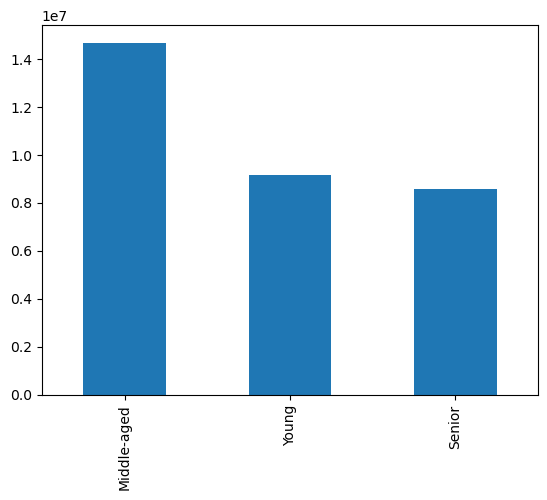

In [62]:
# age_profile
age_profile_bar = df_cust_merge['age_profile'].value_counts().plot.bar()

In [63]:
# Exporting bar chart
age_profile_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_profile_bar.png'))

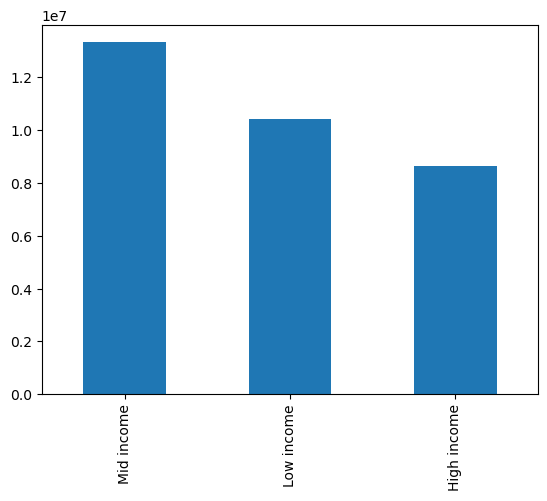

In [64]:
# income_profile
income_profile_bar = df_cust_merge['income_profile'].value_counts().plot.bar()

In [65]:
# Exporting bar chart
income_profile_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_profile_bar.png'))

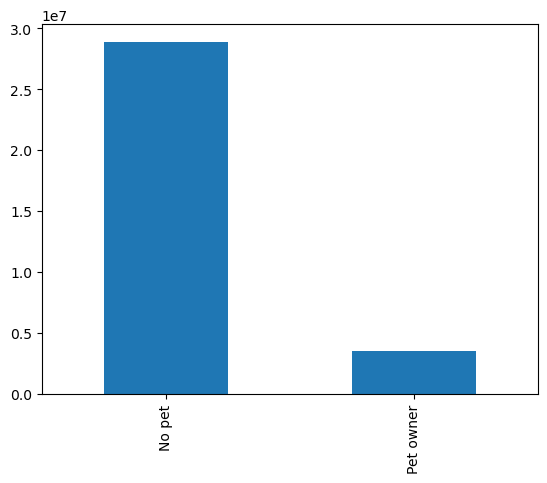

In [66]:
# pet_profile
pet_profile_bar = df_cust_merge['pet_profile'].value_counts().plot.bar()

In [67]:
# Exporting bar chart
pet_profile_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pet_profile_bar.png'))

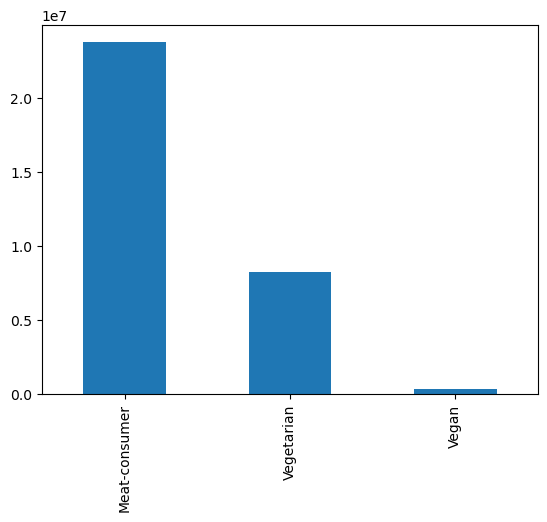

In [68]:
# diet_style
diet_style_bar = df_cust_merge['diet_style'].value_counts().plot.bar()

In [69]:
# Exporting bar chart
diet_style_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'diet_style_bar.png'))

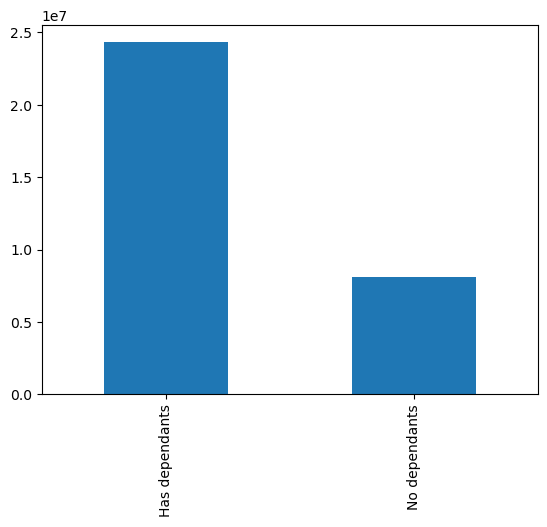

In [70]:
# dependants 
dependants_bar = df_cust_merge['dependants'].value_counts().plot.bar()

In [71]:
# Exporting bar chart
dependants_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dependants_bar.png'))

### 07. Aggregate Mean, Max, & Min
- Customer-profile level for usage frequency and expidenture

In [72]:
# age_profile stats
df_cust_merge.groupby('age_profile').agg({'days_since_prior_order': ['mean', 'max', 'min'], 'prices': ['mean', 'max', 'min']})

days_since_prior_order               prices           
                              mean   max  min      mean   max  min
age_profile                                                       
Middle-aged              11.105992  30.0  0.0  7.791435  25.0  1.0
Senior                   11.078641  30.0  0.0  7.796546  25.0  1.0
Young                    11.124858  30.0  0.0  7.785081  25.0  1.0

In [73]:
# income_profile stats
df_cust_merge.groupby('income_profile').agg({'days_since_prior_order': ['mean', 'max', 'min'], 'prices': ['mean', 'max', 'min']})

days_since_prior_order               prices           
                                 mean   max  min      mean   max  min
income_profile                                                       
High income                 11.024072  30.0  0.0  7.957172  25.0  1.0
Low income                  11.240514  30.0  0.0  7.434729  25.0  1.0
Mid income                  11.049451  30.0  0.0  7.962545  25.0  1.0

In [74]:
# pet_profile stats
df_cust_merge.groupby('pet_profile').agg({'days_since_prior_order': ['mean', 'max', 'min'], 'prices': ['mean', 'max', 'min']})

days_since_prior_order               prices           
                              mean   max  min      mean   max  min
pet_profile                                                       
No pet                   11.200417  30.0  0.0  7.788360  25.0  1.0
Pet owner                10.327303  30.0  0.0  7.812556  25.0  1.0

In [75]:
# diet_style stats

df_cust_merge.groupby('diet_style').agg({'days_since_prior_order': ['mean', 'max', 'min'], 'prices': ['mean', 'max', 'min']})

days_since_prior_order               prices           
                                mean   max  min      mean   max  min
diet_style                                                          
Meat-consumer              10.762605  30.0  0.0  7.905951  25.0  1.0
Vegan                      14.749275  30.0  0.0  7.009920  20.0  1.0
Vegetarian                 11.952600  30.0  0.0  7.496501  20.0  1.0

In [76]:
# dependants stats
df_cust_merge.groupby('dependants').agg({'days_since_prior_order': ['mean', 'max', 'min'], 'prices': ['mean', 'max', 'min']})

days_since_prior_order               prices           
                                 mean   max  min      mean   max  min
dependants                                                           
Has dependants              11.111834  30.0  0.0  7.791334  25.0  1.0
No dependants               11.080805  30.0  0.0  7.789975  25.0  1.0

### 08. Compare Customer Profiles with Regions & Departments
- Identify any links

##### Age

In [77]:
# Creating a crosstab comparing 'age_profile' and 'region', looking at percentages for better comparability
age_region_cross = pd.crosstab(df_cust_merge['age_profile'], df_cust_merge['region'], normalize = 'columns')

In [78]:
age_region_cross

region,Midwest,Northeast,South,West
age_profile,,,,
Middle-aged,0.459602,0.444810,0.451132,0.455511
Senior,0.262045,0.271531,0.262814,0.264573
Young,0.278353,0.283659,0.286054,0.279916


In [80]:
# Creating a crosstab comparing 'age_profile' and 'department_id', looking at row percentages
age_department_cross = pd.crosstab(df_cust_merge['age_profile'], df_cust_merge['department_id'], normalize = 'index')

In [81]:
age_department_cross

department_id,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
age_profile,,,,,,,,,,,,,,,,,,,,,
Middle-aged,0.068932,0.001121,0.036165,0.292636,0.004749,0.008296,0.083295,0.002976,0.026720,0.001049,...,0.021776,0.057839,0.021697,0.032856,0.166074,0.022806,0.013413,0.089074,0.032448,0.002113
Senior,0.069232,0.001099,0.036096,0.293147,0.004552,0.008253,0.083362,0.003065,0.026698,0.001078,...,0.022171,0.057956,0.021439,0.032937,0.166321,0.022966,0.012763,0.088689,0.032375,0.002110
Young,0.068762,0.001138,0.036285,0.291769,0.004912,0.008381,0.082025,0.003031,0.026825,0.001085,...,0.021765,0.057850,0.021933,0.033147,0.167717,0.022617,0.012836,0.089558,0.032492,0.002190


##### Department_id Key
1: frozen,
2: other,
3: bakery,
4: produce,
5: alcohol,
6: international,
7: beverages,
8: pets,
9: dry goods pasta,
10: bulk,
11: personal care,
12: meat seafood,
13: pantry,
14: breakfast,
15: canned goods,
16: dairy eggs,
17: household,
18: babies,
19: snacks,
20: deli,
21: missing

##### Observations:
- Age groups have similar rates in each region, with the middle-aged (35-65) age group having the highest rate of customers
- All age groups seem to buy products from all departments at a similar rate

##### Income

In [82]:
# Creating a crosstab comparing 'income_profile' and 'region', looking at percentages for better comparability
income_region_cross = pd.crosstab(df_cust_merge['income_profile'], df_cust_merge['region'], normalize = 'columns')

In [83]:
income_region_cross

region,Midwest,Northeast,South,West
income_profile,,,,
High income,0.270318,0.268977,0.262824,0.265481
Low income,0.319571,0.318405,0.323667,0.325550
Mid income,0.410111,0.412618,0.413510,0.408968


In [84]:
# Creating a crosstab comparing 'income_profile' and 'department_id'
income_department_cross = pd.crosstab(df_cust_merge['income_profile'], df_cust_merge['department_id'], normalize = 'index') 

In [85]:
income_department_cross

department_id,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
income_profile,,,,,,,,,,,,,,,,,,,,,
High income,0.070178,0.001124,0.037367,0.296090,0.005225,0.008508,0.079665,0.003198,0.027690,0.000964,...,0.023733,0.059357,0.021042,0.034518,0.169215,0.022926,0.013578,0.077290,0.032395,0.002141
Low income,0.067229,0.001114,0.034505,0.279570,0.004614,0.007760,0.091741,0.002845,0.024468,0.001184,...,0.017992,0.055207,0.023537,0.030146,0.160883,0.023559,0.011447,0.113855,0.032205,0.002150
Mid income,0.069535,0.001122,0.036725,0.300369,0.004532,0.008610,0.078201,0.003031,0.027914,0.001042,...,0.023719,0.059001,0.020675,0.034155,0.169392,0.022112,0.014033,0.077375,0.032656,0.002116


##### Department_id Key
1: frozen,
2: other,
3: bakery,
4: produce,
5: alcohol,
6: international,
7: beverages,
8: pets,
9: dry goods pasta,
10: bulk,
11: personal care,
12: meat seafood,
13: pantry,
14: breakfast,
15: canned goods,
16: dairy eggs,
17: household,
18: babies,
19: snacks,
20: deli,
21: missing

##### Observations:
- High income customers have the smallest percentage of orders
- There are slight fluctuations in some departments but are consistently similar
- Low income customers are the top consumers in departments 7, 10, 14, 17, and 19

##### Pets

In [90]:
# Creating a crosstab comparing 'pet_profile' and 'region', looking at percentages for better comparability
pet_region_cross = pd.crosstab(df_cust_merge['pet_profile'], df_cust_merge['region'], normalize = 'columns')

In [91]:
pet_region_cross

region,Midwest,Northeast,South,West
pet_profile,,,,
No pet,0.888836,0.892981,0.894204,0.887927
Pet owner,0.111164,0.107019,0.105796,0.112073


In [92]:
# Creating a crosstab comparing 'pet_profile' and 'department_id'
pet_department_cross = pd.crosstab(df_cust_merge['pet_profile'], df_cust_merge['department_id'], normalize = 'index')

In [93]:
pet_department_cross

department_id,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
pet_profile,,,,,,,,,,,,,,,,,,,,,
No pet,0.067467,0.001073,0.035727,0.301132,0.004379,0.008229,0.081797,0.000000,0.026454,0.001123,...,0.021731,0.057295,0.021716,0.032514,0.168440,0.020810,0.013420,0.089221,0.032534,0.002131
Pet owner,0.081209,0.001508,0.039890,0.222100,0.007724,0.008966,0.092426,0.027696,0.029118,0.000606,...,0.023070,0.062607,0.021523,0.036612,0.151564,0.039044,0.010282,0.088190,0.031683,0.002160


##### Department_id Key
1: frozen,
2: other,
3: bakery,
4: produce,
5: alcohol,
6: international,
7: beverages,
8: pets,
9: dry goods pasta,
10: bulk,
11: personal care,
12: meat seafood,
13: pantry,
14: breakfast,
15: canned goods,
16: dairy eggs,
17: household,
18: babies,
19: snacks,
20: deli,
21: missing

##### Observations:
- Non pet owners vastly outnumber pet owners but have similar rates across all regions
- Pet owners seem to spend more in departments 1, 7, 8, 13, and 17

##### Diet Style

In [119]:
# Creating a crosstab comparing 'diet_style' and 'region', looking at percentages for better comparability
diet_region_cross = pd.crosstab(df_cust_merge['diet_style'], df_cust_merge['region'], normalize = 'columns')

In [120]:
diet_region_cross

region,Midwest,Northeast,South,West
diet_style,,,,
Meat-consumer,0.730808,0.734091,0.733396,0.734928
Vegan,0.011885,0.011841,0.011611,0.012066
Vegetarian,0.257307,0.254068,0.254993,0.253005


In [121]:
# Creating a crosstab comparing 'diet_style' and 'department_id', looking at row percentages
diet_department_cross = pd.crosstab(df_cust_merge['diet_style'], df_cust_merge['department_id'], normalize = 'index')

In [122]:
diet_department_cross

department_id,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
diet_style,,,,,,,,,,,,,,,,,,,,,
Meat-consumer,0.070033,0.001028,0.037543,0.301082,0.003516,0.008651,0.071737,0.003025,0.029242,0.000954,...,0.029834,0.059442,0.020025,0.035551,0.166132,0.020707,0.014493,0.079508,0.032863,0.002066
Vegan,0.059795,0.002470,0.017964,0.303800,0.034432,0.004222,0.193680,0.003484,0.009386,0.001750,...,0.000000,0.045936,0.021263,0.017244,0.000000,0.063884,0.006045,0.165925,0.018809,0.002037
Vegetarian,0.066311,0.001322,0.033105,0.267389,0.006896,0.007515,0.110089,0.002966,0.020360,0.001361,...,0.000000,0.053913,0.026520,0.026235,0.175692,0.026896,0.009335,0.113165,0.031859,0.002335


##### Department_id Key
1: frozen,
2: other,
3: bakery,
4: produce,
5: alcohol,
6: international,
7: beverages,
8: pets,
9: dry goods pasta,
10: bulk,
11: personal care,
12: meat seafood,
13: pantry,
14: breakfast,
15: canned goods,
16: dairy eggs,
17: household,
18: babies,
19: snacks,
20: deli,
21: missing

##### Observations
- Diet style rates are similar across all regions, with meat-consumers having the highest rate
- Vegans spend the most in departments 5, 7, 17, & 19
- Vegetarians suprisingly spend the least on produce

##### Dependants

In [99]:
# Creating a crosstab comparing 'dependants' and 'region', looking at percentages for better comparability
family_region_cross = pd.crosstab(df_cust_merge['dependants'], df_cust_merge['region'], normalize = 'columns')

In [100]:
family_region_cross

region,Midwest,Northeast,South,West
dependants,,,,
Has dependants,0.749228,0.752164,0.749658,0.750107
No dependants,0.250772,0.247836,0.250342,0.249893


In [101]:
# Creating a crosstab comparing 'dependants' and 'department_id', 
family_department_cross = pd.crosstab(df_cust_merge['dependants'], df_cust_merge['department_id'], normalize = 'index')

In [102]:
family_department_cross

department_id,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
dependants,,,,,,,,,,,,,,,,,,,,,
Has dependants,0.069015,0.001116,0.036122,0.292251,0.004714,0.008291,0.082842,0.003009,0.026797,0.001082,...,0.022003,0.057950,0.021741,0.033044,0.166591,0.022952,0.013054,0.089140,0.032340,0.002142
No dependants,0.068806,0.001133,0.036358,0.293355,0.004831,0.008362,0.083290,0.003036,0.026584,0.001022,...,0.021498,0.057642,0.021559,0.032706,0.166639,0.022325,0.013151,0.089015,0.032744,0.002110


##### Department_id Key
1: frozen,
2: other,
3: bakery,
4: produce,
5: alcohol,
6: international,
7: beverages,
8: pets,
9: dry goods pasta,
10: bulk,
11: personal care,
12: meat seafood,
13: pantry,
14: breakfast,
15: canned goods,
16: dairy eggs,
17: household,
18: babies,
19: snacks,
20: deli,
21: missing

##### Observations:
- There are similar rates of customers with dependants and without across all regions
- Having dependants or not does not seem to have an effect on which department customers buy from

### 09. Produce Charts & Visualizations

##### Age

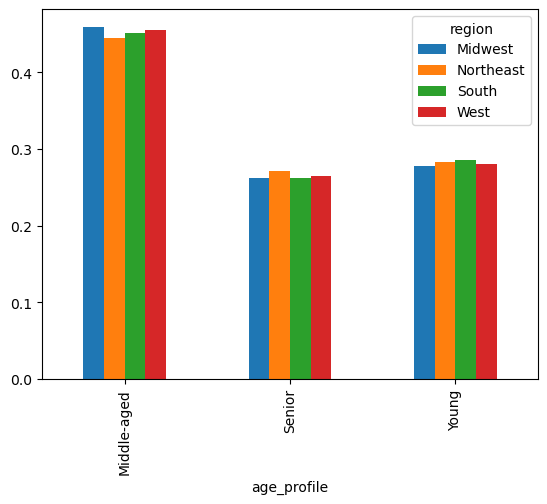

In [103]:
# age_profile by region
age_region_bar = age_region_cross.plot.bar()

In [104]:
# Exporting chart
age_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_region_bar.png'))

In [106]:
# Creating a new crosstab so that the departments are on the x-axis
age_dept_cross = pd.crosstab(df_cust_merge['department_id'], df_cust_merge['age_profile'])

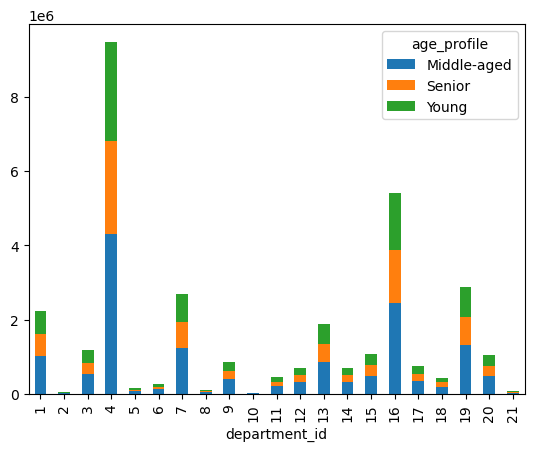

In [107]:
# Creating a stacked bar plot of the new crosstab
age_dept_bar = age_dept_cross.plot.bar(stacked = True)

In [108]:
# Exporting chart
age_dept_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_dept_bar.png'))

In [166]:
# Age profile normalized
# Crosstab department preferences and age groups  - normalized
cross_dept_age_norm = pd.crosstab(index = df_cust_merge['department_id'], 
                                         columns = df_cust_merge['age_profile'], 
                                         normalize = 'index')

In [167]:
# Second crosstab to put labels on chart
cross_dept_age_2 = pd.crosstab(index = df_cust_merge['department_id'], 
                                         columns = df_cust_merge['age_profile'])

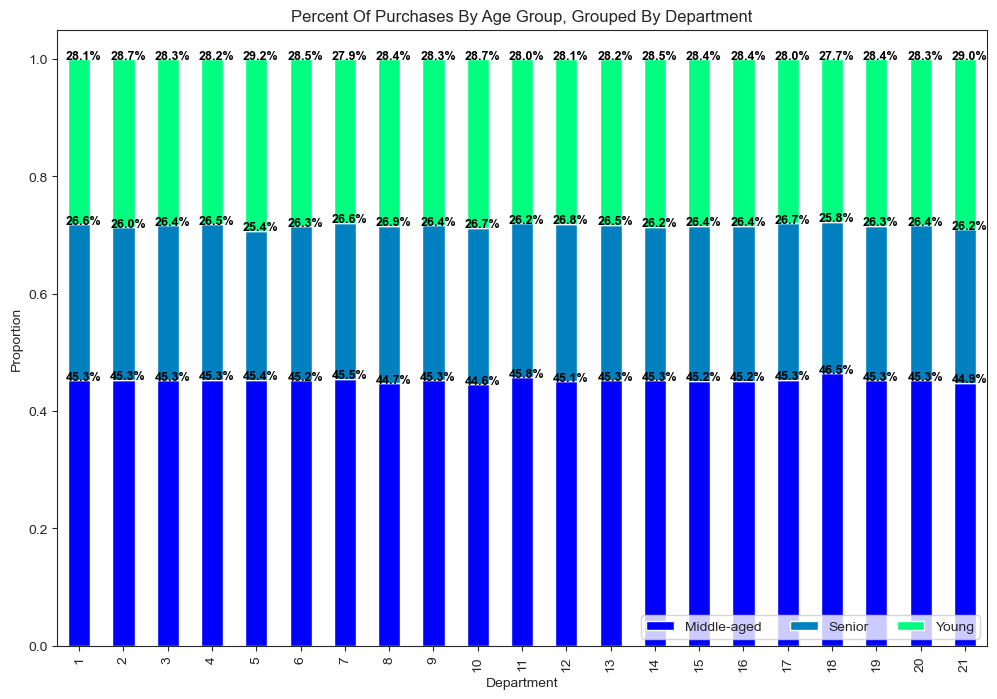

In [169]:
# Normalized bar chart of purchases by age group, grouped by department
bar_dept_age_norm = cross_dept_age_norm.plot( kind ='bar',
                                                stacked = True,
                                                colormap = 'winter',
                                                figsize = (12, 8))
 
plt.title('Percent Of Purchases By Age Group, Grouped By Department')
plt.legend(loc = 'lower right', ncol = 3)
plt.xlabel('Department')
plt.xticks(rotation = 90)
plt.ylabel('Proportion')

for n, x in enumerate([*cross_dept_age_2.index.values]):
    for (proportion, y_loc) in zip(cross_dept_age_norm.loc[x],
                                   cross_dept_age_norm.loc[x].cumsum()):
    
        plt.text(x= n -0.30,
                 y= y_loc,
                 s= f'{np.round(proportion * 100, 1)}%',
                 color ='black',
                 fontsize = 9,
                 fontweight = 'bold')

plt.show()

In [187]:
# Exporting chart
bar_dept_age_norm.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_dept_age_norm.png'))

##### Income

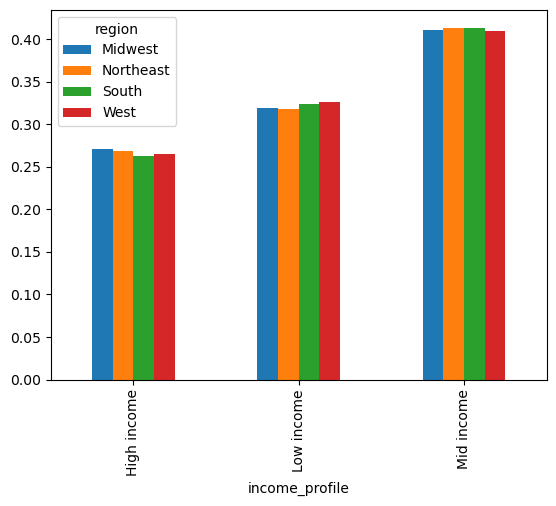

In [109]:
# income_profile by region
income_region_bar = income_region_cross.plot.bar()

In [110]:
# Exporting chart
income_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_region_bar.png'))

In [111]:
# Creating a new crosstab so that the departments are on the x-axis
income_dept_cross = pd.crosstab(df_cust_merge['department_id'], df_cust_merge['income_profile'])

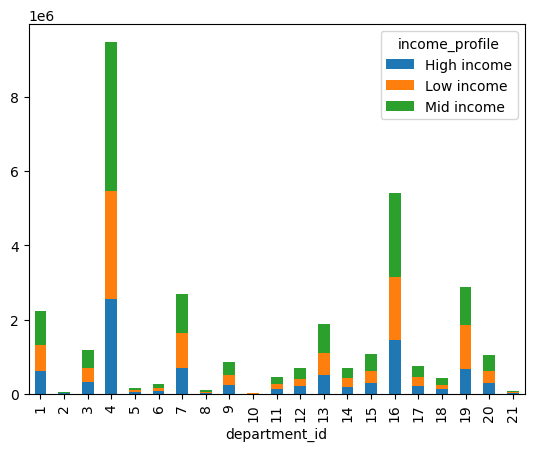

In [112]:
# Creating a stacked bar plot of the new crosstab
income_dept_bar = income_dept_cross.plot.bar(stacked = True)

In [113]:
# Exporting chart
income_dept_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_dept_bar.png'))

In [171]:
# Income profile
# Crosstab department preferences and income groups  - normalized
cross_dept_income_norm = pd.crosstab(index = df_cust_merge['department_id'], 
                                         columns = df_cust_merge['income_profile'], 
                                         normalize = 'index')

In [172]:
# Second crosstab to put labels on chart
cross_dept_income_2 = pd.crosstab(index = df_cust_merge['department_id'], 
                                         columns = df_cust_merge['income_profile'])

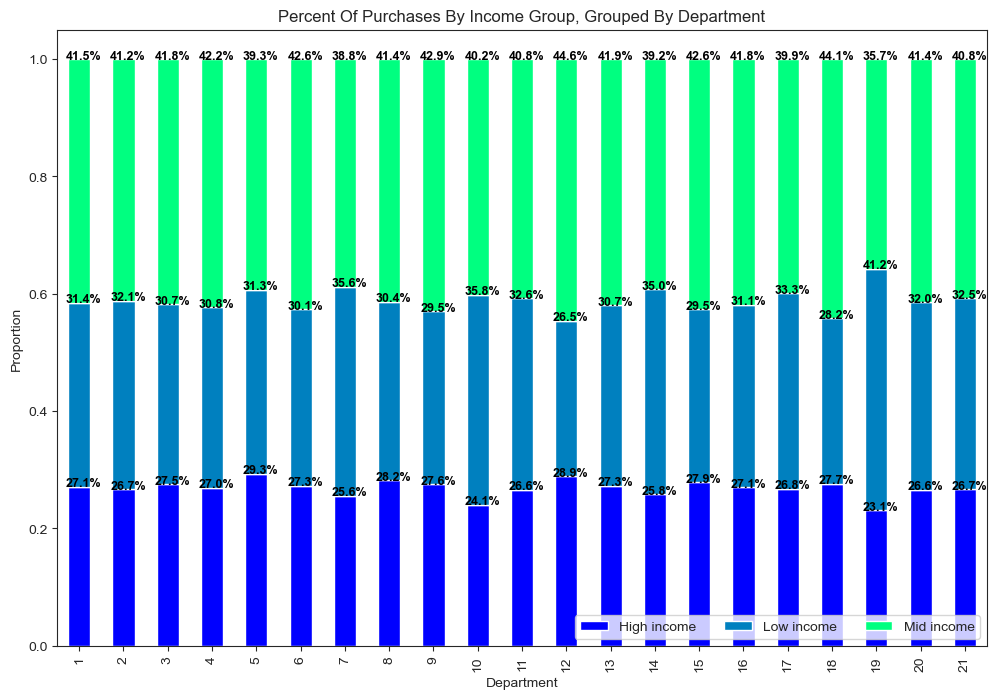

In [177]:
#Normalized bar chart of purchases by income group, grouped by department
bar_dept_income_norm = cross_dept_income_norm.plot( kind ='bar',
                                                    stacked = True,
                                                    colormap = 'winter',
                                                    figsize = (12, 8))
 
plt.title('Percent Of Purchases By Income Group, Grouped By Department')
plt.legend(loc = 'lower right', ncol = 3)
plt.xlabel('Department')
plt.xticks(rotation = 90)
plt.ylabel('Proportion')

for n, x in enumerate([*cross_dept_income_2.index.values]):
    for (proportion, y_loc) in zip(cross_dept_income_norm.loc[x],
                                   cross_dept_income_norm.loc[x].cumsum()):
    
        plt.text(x= n -0.30,
                 y= y_loc,
                 s= f'{np.round(proportion * 100, 1)}%',
                 color ='black',
                 fontsize = 9,
                 fontweight = 'bold')

plt.show()

In [178]:
# Exporting chart
bar_dept_income_norm.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_dept_income_norm.png'))

##### Pets

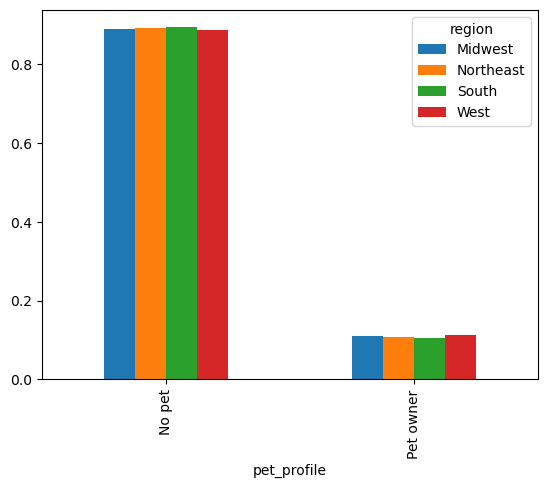

In [114]:
# Pet ownership by region
pet_region_bar = pet_region_cross.plot.bar()

In [115]:
# Exporting chart
pet_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pet_region_bar.png'))

In [116]:
# Creating a new crosstab so that the departments are on the x-axis
pet_dept_cross = pd.crosstab(df_cust_merge['department_id'], df_cust_merge['pet_profile'], normalize = 'index')

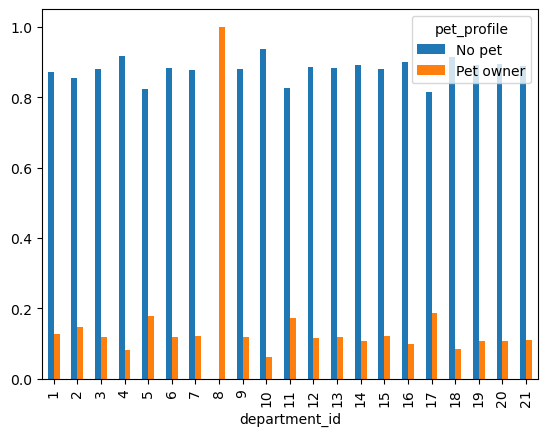

In [117]:
# Creating a stacked bar plot of the new crosstab
pet_dept_bar = pet_dept_cross.plot.bar()

In [186]:
# Exporting chart
pet_dept_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pet_dept_bar.png'))

##### Diet Style

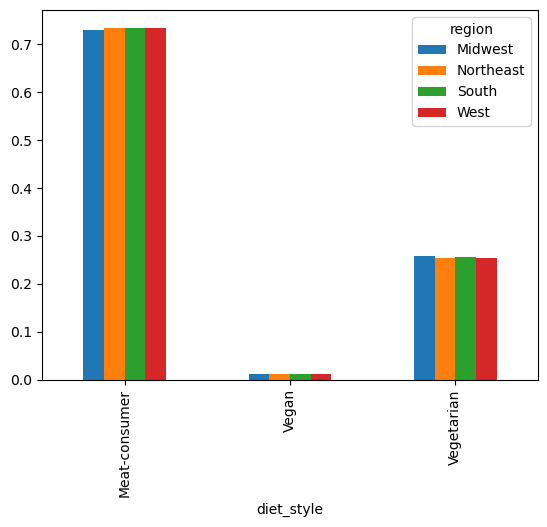

In [124]:
# Diet style by region
diet_style_bar = diet_region_cross.plot.bar()

In [125]:
# Exporting chart
diet_style_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'diet_style_bar.png'))

In [128]:
# Creating a new crosstab so that the departments are on the x-axis
diet_dept_cross = pd.crosstab(df_cust_merge['department_id'], df_cust_merge['diet_style'])

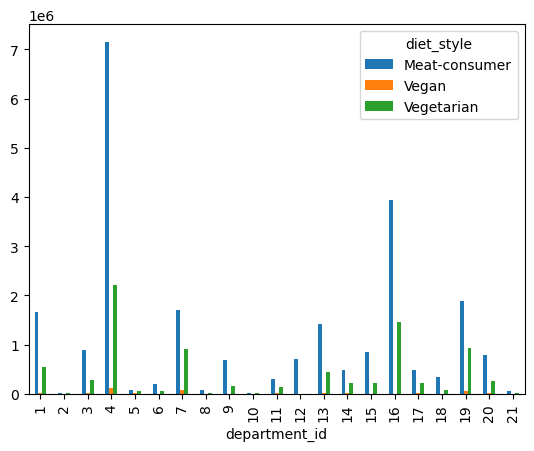

In [129]:
# Creating a stacked bar plot of the new crosstab
diet_dept_bar = diet_dept_cross.plot.bar()

In [130]:
# Exporting chart
diet_dept_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'diet_dept_bar.png'))

In [179]:
# Diet profile
# Crosstab department preferences and diet styles  - normalized
cross_dept_diet_norm = pd.crosstab(index = df_cust_merge['department_id'], 
                                         columns = df_cust_merge['diet_style'], 
                                         normalize = 'index')

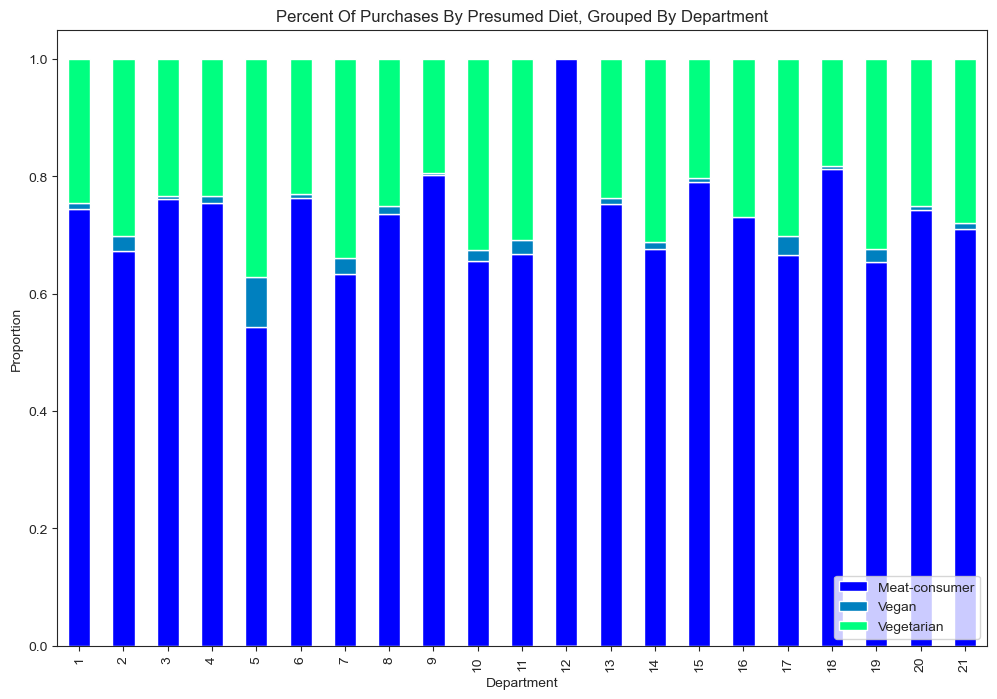

In [180]:
#Normalized bar chart of purchases by diet styles, grouped by department
bar_dept_diet_norm = cross_dept_diet_norm.plot( kind ='bar',
                                                stacked = True,
                                                colormap = 'winter',
                                                figsize = (12, 8))
 
plt.title('Percent Of Purchases By Presumed Diet, Grouped By Department')
plt.legend(loc = 'lower right', ncol = 1)
plt.xlabel('Department')
plt.xticks(rotation = 90)
plt.ylabel('Proportion')

plt.show()

In [185]:
# Exporting chart
bar_dept_diet_norm.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_dept_diet_norm.png'))

##### Dependants

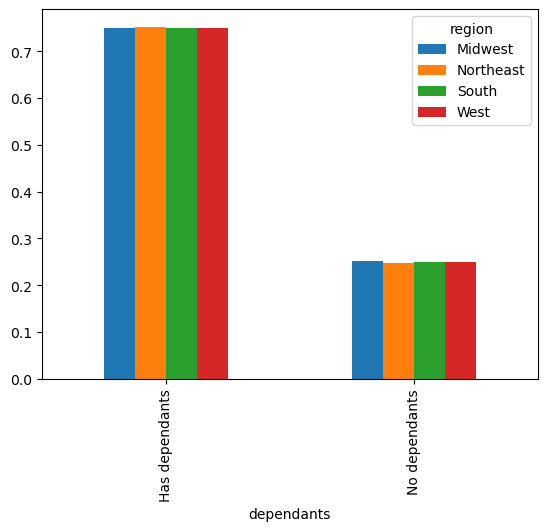

In [133]:
# Dependants by region
dependants_region_bar = family_region_cross.plot.bar()

In [134]:
# Exporting chart
dependants_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dependants_region_bar.png'))

In [135]:
# Creating a new crosstab so that the departments are on the x-axis
dependant_dept_cross = pd.crosstab(df_cust_merge['department_id'], df_cust_merge['dependants'])

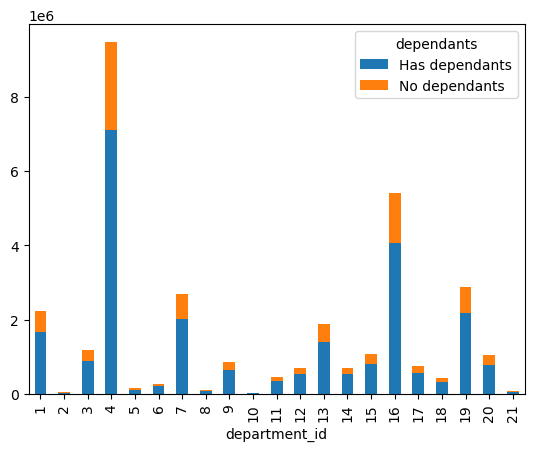

In [136]:
# Creating a stacked bar plot of the new crosstab
dependant_dept_bar = dependant_dept_cross.plot.bar(stacked = True)

In [137]:
# Exporting chart
dependant_dept_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dependant_dept_bar.png'))

### Further Analysis & Visualizations for Report

### Question: What’s the distribution among users in regards to their brand loyalty?

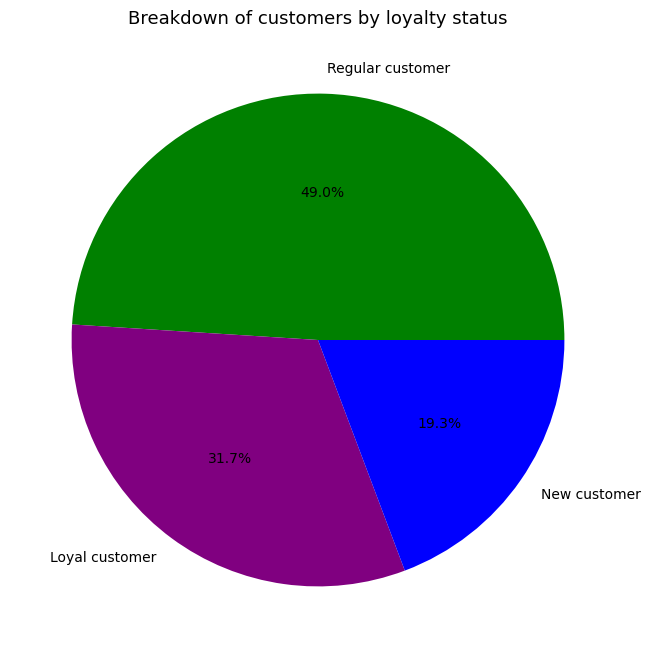

In [141]:
#Pie chart of customers by loyalty flag
pie_user_loyal = df_cust_merge['loyalty_flag'].value_counts().plot.pie(figsize = (8,8), 
                                                              colors = ('Green', 'Purple', 'Blue'), 
                                                              autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Breakdown of customers by loyalty status',fontsize=13)
plt.show()

In [142]:
# Exporting pie chart
pie_user_loyal.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_user_loyal.png'))

### Question: Are there differences in ordering habits based on a customer’s loyalty status?

In [193]:
# Loyalty flag profile
# Crosstab department and loyal customer flag - normalized
cross_dept_loyal_norm = pd.crosstab(index = df_cust_merge['department_id'], 
                                         columns = df_cust_merge['loyalty_flag'], 
                                         normalize = 'index')

In [194]:
# Second crosstab to put labels on chart
cross_dept_loyal_2 = pd.crosstab(index = df_cust_merge['department_id'], 
                                         columns = df_cust_merge['loyalty_flag'])

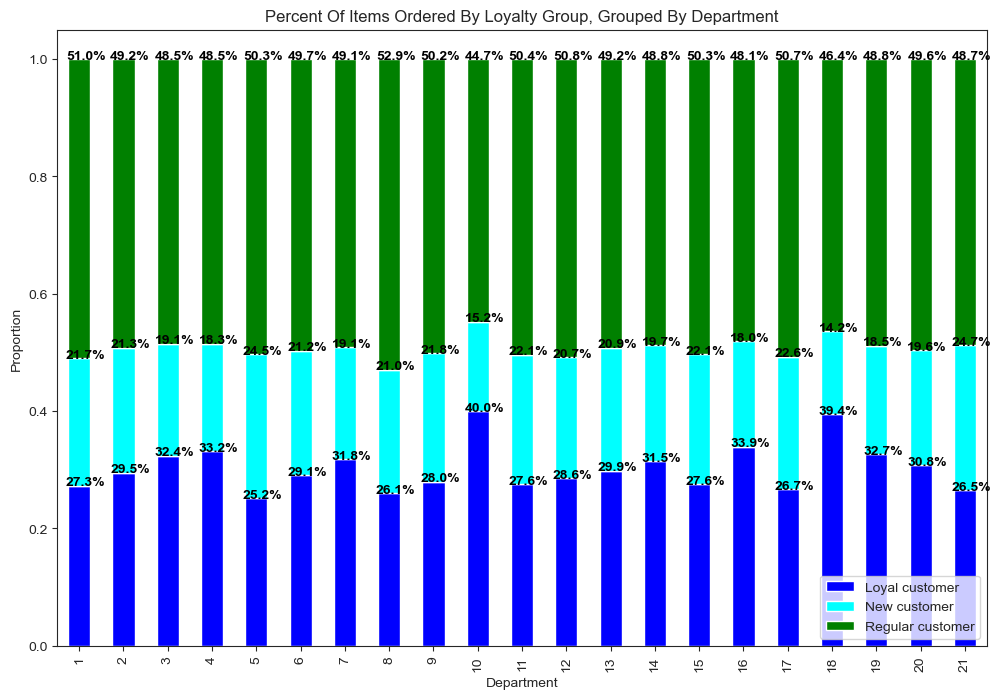

In [195]:
# Normalized bar chart of items ordered by loyalty group, grouped by department
bar_dept_loyalty_norm = cross_dept_loyal_norm.plot( kind ='bar',
                                                stacked = True,
                                                color = ('Blue', 'Cyan', 'Green'),
                                                figsize = (12, 8))
 
plt.title('Percent Of Items Ordered By Loyalty Group, Grouped By Department')
plt.legend(loc = 'lower right', ncol = 1)
plt.xlabel('Department')
plt.xticks(rotation = 90)
plt.ylabel('Proportion')

for n, x in enumerate([*cross_dept_loyal_2.index.values]):
    for (proportion, y_loc) in zip(cross_dept_loyal_norm.loc[x],
                                   cross_dept_loyal_norm.loc[x].cumsum()):
    
        plt.text(x= n -0.30,
                 y= y_loc,
                 s= f'{np.round(proportion * 100, 1)}%',
                 color ='black',
                 fontsize = 10,
                 fontweight = 'bold')

plt.show()

In [196]:
# Exporting chart
bar_dept_loyalty_norm.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_dept_loyalty_norm.png'))

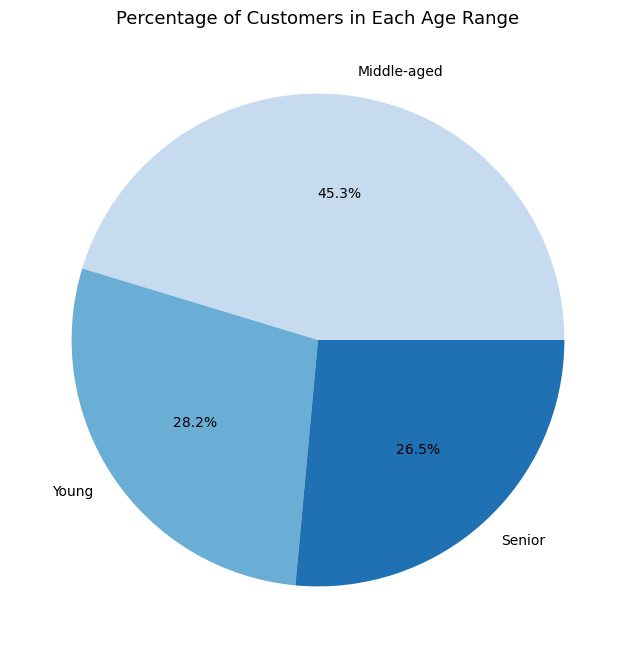

In [144]:
# Age profile visualization
pie_user_age = df_cust_merge['age_profile'].value_counts().plot.pie(figsize = (8,8), 
                                                                colors = sns.color_palette('Blues', 3), 
                                                                autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Percentage of Customers in Each Age Range',fontsize=13)
plt.show()

In [146]:
# Exporting pie chart
pie_user_age.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_user_age.png'))

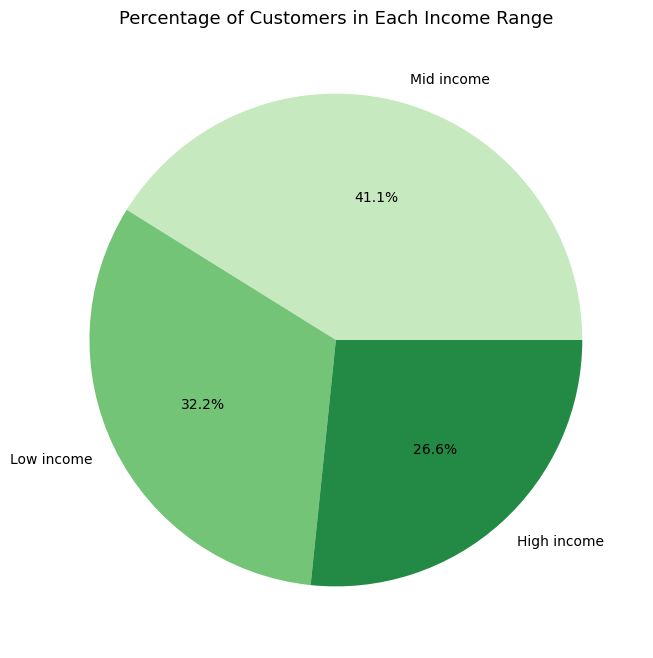

In [147]:
# Pie chart of customer income ranges
pie_user_income = df_cust_merge['income_profile'].value_counts().plot.pie(figsize = (8,8), 
                                                                      colors = sns.color_palette('Greens', 3), 
                                                                      autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Percentage of Customers in Each Income Range',fontsize=13)
plt.show()

In [148]:
# Exporting pie chart
pie_user_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_user_income.png'))

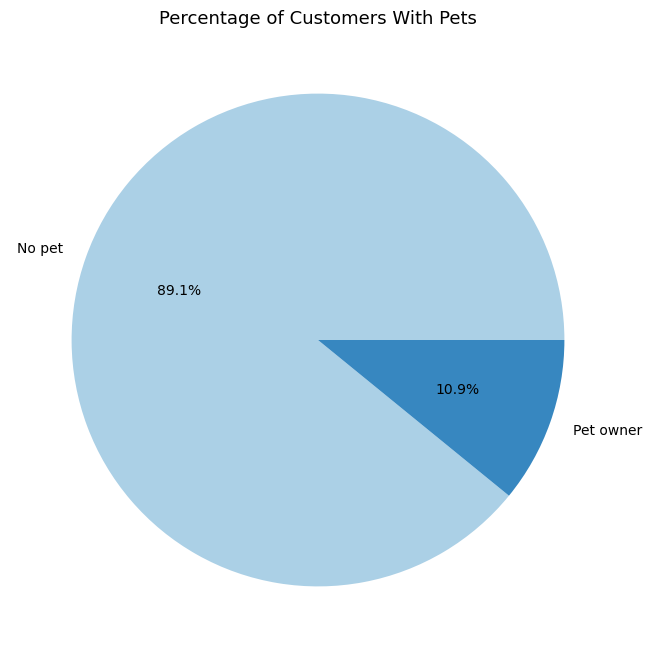

In [149]:
# Pie chart of customer's pet ownership 
pie_user_pet = df_cust_merge['pet_profile'].value_counts().plot.pie(figsize = (8,8), 
                                                              colors = sns.color_palette('Blues', 2), 
                                                              autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Percentage of Customers With Pets',fontsize=13)
plt.show()

In [150]:
# Exporting pie chart
pie_user_pet.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_user_pet.png'))

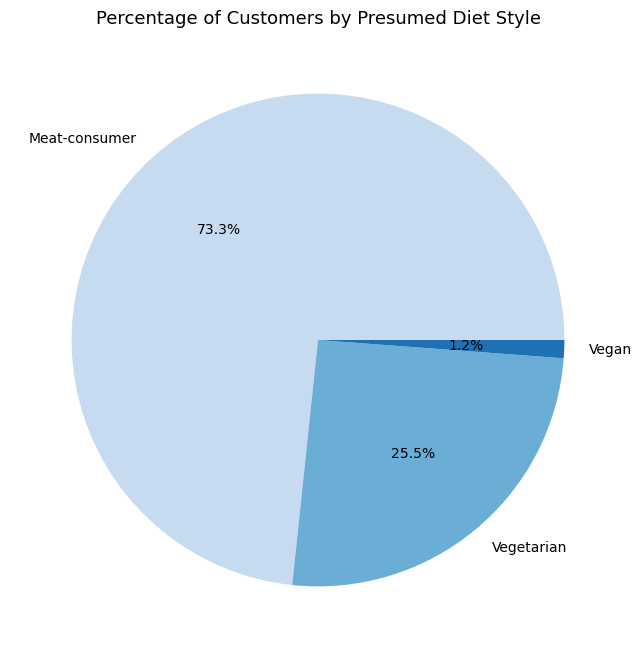

In [151]:
# Pie chart of customer's diet style based on previous buying history
pie_user_diet = df_cust_merge['diet_style'].value_counts().plot.pie(figsize = (8,8), 
                                                                  colors = sns.color_palette('Blues', 3), 
                                                                  autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Percentage of Customers by Presumed Diet Style',fontsize=13)
plt.show()

In [152]:
# Exporting pie chart
pie_user_diet.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_user_diet.png'))

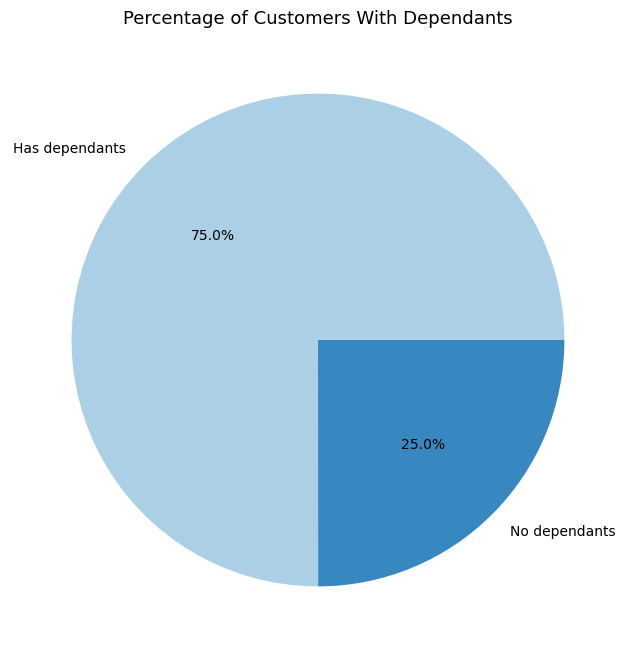

In [153]:
#Pie chart of customer with dependants
pie_user_dependants = df_cust_merge['dependants'].value_counts().plot.pie(figsize = (8,8), 
                                                                        colors = sns.color_palette('Blues', 2), 
                                                                        autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Percentage of Customers With Dependants',fontsize=13)
plt.show()

In [154]:
# Exporting pie chart
pie_user_dependants.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_user_dependants.png'))

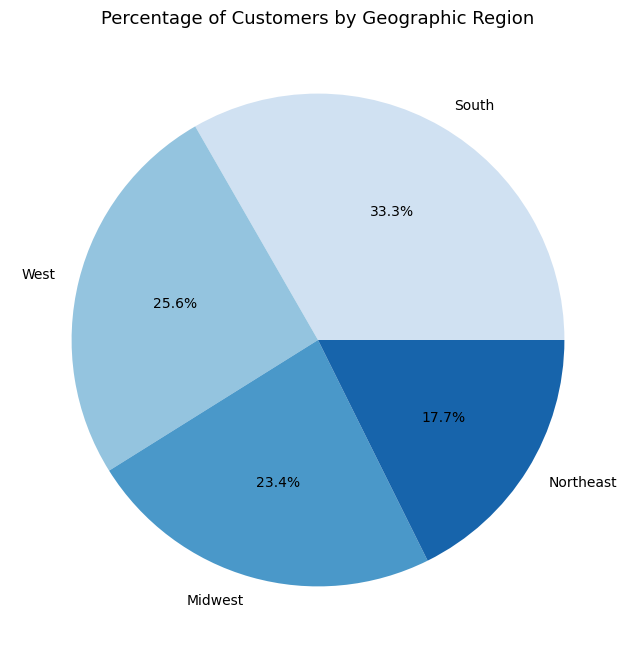

In [155]:
#Pie chart of percentage of regular customers in each region
pie_user_region = df_cust_merge['region'].value_counts().plot.pie(figsize = (8,8), colors = sns.color_palette('Blues', 4), autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Percentage of Customers by Geographic Region',fontsize=13)
plt.show()

In [156]:
# Exporting pie chart
pie_user_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_user_region.png'))

### Question: Are there certain types of products that are more popular than others? The marketing and sales teams want to know which departments have the highest frequency of product orders.

In [158]:
# List Departments by number of ordered products
df_cust_merge['department_id'].value_counts(dropna = False)

4     9479291
16    5398747
19    2887550
7     2688123
1     2234743
13    1875369
3     1172428
15    1068058
20    1051249
9      866627
17     738666
12     708927
14     703033
11     447572
18     423802
6      269253
5      153696
8       97716
21      69145
2       36291
10      34573
Name: department_id, dtype: int64

##### Department_id Key
1: frozen,
2: other,
3: bakery,
4: produce,
5: alcohol,
6: international,
7: beverages,
8: pets,
9: dry goods pasta,
10: bulk,
11: personal care,
12: meat seafood,
13: pantry,
14: breakfast,
15: canned goods,
16: dairy eggs,
17: household,
18: babies,
19: snacks,
20: deli,
21: missing

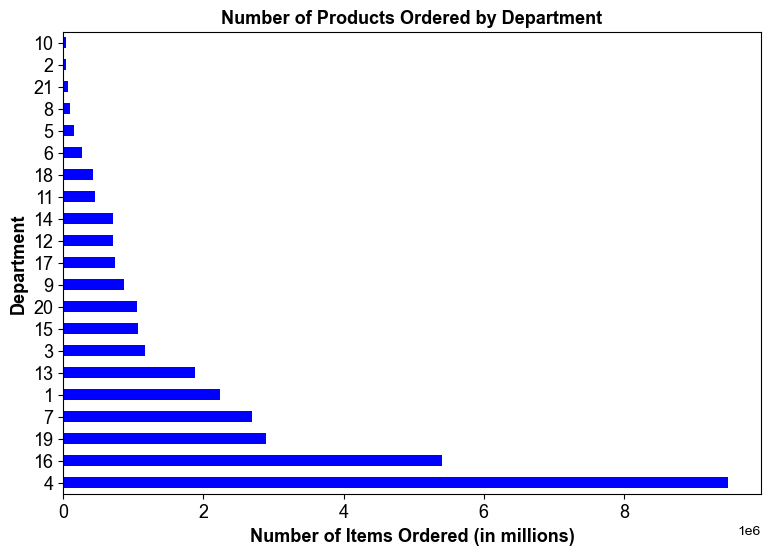

In [159]:
# Bar chart of departments by products ordered
bar_top_depts = df_cust_merge['department_id'].value_counts().plot.barh(figsize = (9,6), color = ['blue'])
sns.set_style('ticks')
plt.xlabel('Number of Items Ordered (in millions)', fontsize = 13, fontweight = 'bold')
plt.ylabel('Department', fontsize = 13, fontweight = 'bold')
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.title('Number of Products Ordered by Department', fontsize = 13, fontweight = 'bold')
plt.show()

In [160]:
# Exporting chart
bar_top_depts.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_top_depts.png'))

In [182]:
# Order frequency profile
# Crosstab department and order_frequency flag - normalized
cross_dept_freq_norm = pd.crosstab(index = df_cust_merge['department_id'], 
                                         columns = df_cust_merge['frequency_flag'], 
                                         normalize = 'index')

In [183]:
# Second crosstab to put labels on chart
cross_dept_freq_2 = pd.crosstab(index = df_cust_merge['department_id'], 
                                         columns = df_cust_merge['frequency_flag'])

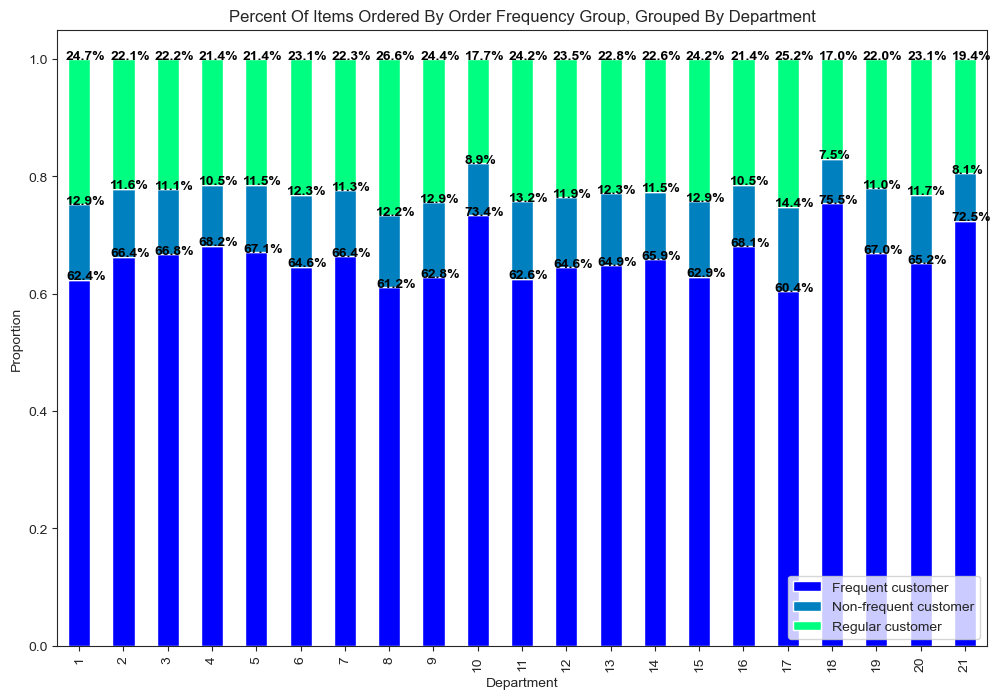

In [184]:
# Normalized bar chart of items ordered by order frquency group, grouped by department
bar_dept_freq_norm = cross_dept_freq_norm.plot( kind ='bar',
                                                stacked = True,
                                                colormap = 'winter',
                                                figsize = (12, 8))
 
plt.title('Percent Of Items Ordered By Order Frequency Group, Grouped By Department')
plt.legend(loc = 'lower right', ncol = 1)
plt.xlabel('Department')
plt.xticks(rotation = 90)
plt.ylabel('Proportion')

for n, x in enumerate([*cross_dept_freq_2.index.values]):
    for (proportion, y_loc) in zip(cross_dept_freq_norm.loc[x],
                                   cross_dept_freq_norm.loc[x].cumsum()):
    
        plt.text(x= n -0.30,
                 y= y_loc,
                 s= f'{np.round(proportion * 100, 1)}%',
                 color ='black',
                 fontsize = 10,
                 fontweight = 'bold')

plt.show()

In [188]:
# Exporting chart
bar_dept_freq_norm.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_dept_freq_norm.png'))

### Question: Are there differences in ordering habits based on a customer’s region?

In [161]:
# Crosstab region and departments - normalized
cross_dept_region = pd.crosstab(index = df_cust_merge['department_id'], 
                                         columns = df_cust_merge['region'], 
                                         normalize = 'index')

In [162]:
# Second crosstab to put labels on chart
cross_dept_region_2 = pd.crosstab(index = df_cust_merge['department_id'], columns = df_cust_merge['region'])

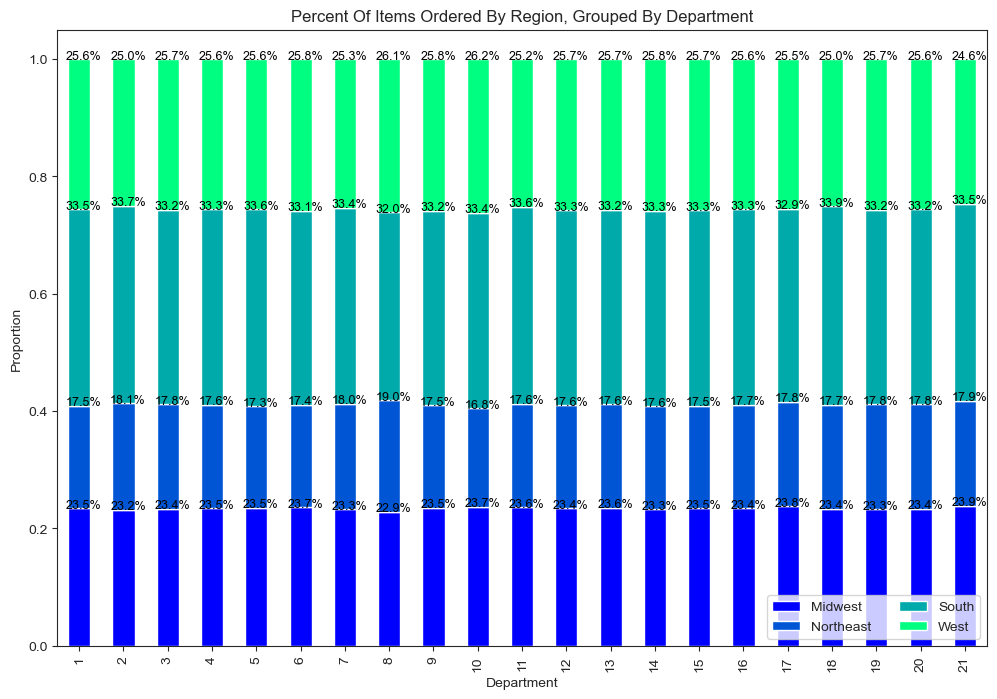

In [163]:
# Normalized bar chart of items ordered by region, grouped by department
bar_norm_dept_region = cross_dept_region.plot( kind ='bar',
                                                   stacked = True,
                                                   colormap = 'winter',
                                                   figsize = (12, 8)) 
plt.title('Percent Of Items Ordered By Region, Grouped By Department')
plt.legend(loc = 'lower right', ncol = 2)
plt.xlabel('Department')
plt.xticks(rotation = 90)
plt.ylabel('Proportion')

for n, x in enumerate([*cross_dept_region_2.index.values]):
    for (proportion, y_loc) in zip(cross_dept_region.loc[x],
                                   cross_dept_region.loc[x].cumsum()):    
        plt.text(x= n -0.30,
                 y= y_loc,
                 s= f'{np.round(proportion * 100, 1)}%',
                 color ='black',
                 fontsize = 9)
plt.show()

In [197]:
# Exporting chart
bar_norm_dept_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_norm_dept_region.png'))

### 10. Export Final Data Set

In [198]:
# Export as pkl
df_cust_merge.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_cust_merge_final.pkl'))